In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

def comma_to_float(varstr):
  return float(varstr.decode("utf-8").replace(',','.'))

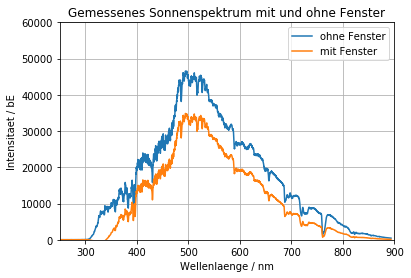

In [42]:
# Intensität mit / ohne Fenster
lamb_og, inten_og = np.loadtxt('data/himmel_o_g.txt', skiprows=17, 
                               converters={0:comma_to_float, 1:comma_to_float}, 
                               comments='>', unpack=True)
lamb_mg, inten_mg = np.loadtxt('data/himmel_m_g.txt', skiprows=17, 
                               converters={0:comma_to_float, 1:comma_to_float}, 
                               comments='>', unpack=True)

plt.clf()
plt.plot(lamb_og, inten_og, label='ohne Fenster')
plt.plot(lamb_mg, inten_mg, label='mit Fenster')
plt.title('Gemessenes Sonnenspektrum mit und ohne Fenster')
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Intensitaet / bE')
plt.legend()
plt.grid()
plt.ylim((0,60000))
plt.xlim((250,900))
plt.savefig("figures/Himmel_m_o_G.pdf", format="pdf")

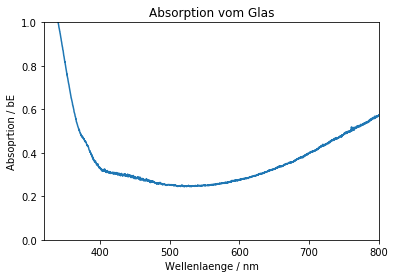

In [43]:
# Absorption Fenster
A = 1 - inten_mg/inten_og

plt.clf()
plt.plot(lamb_mg, A)
plt.title('Absorption vom Glas')
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Absoprtion / bE')
plt.ylim((0,1))
plt.xlim((320,800))
plt.savefig("figures/Absorption_Glas.pdf", format="pdf")

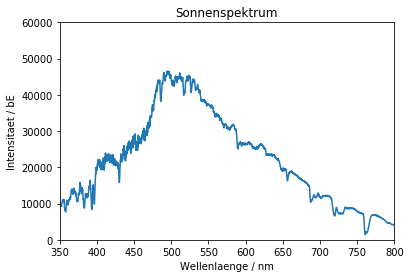

In [44]:
# Fraunhoferlinien
plt.clf()
plt.plot(lamb_og, inten_og)
plt.title('Sonnenspektrum')
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Intensitaet / bE')
plt.ylim((0,60000))
plt.xlim((350,800))
plt.savefig("figures/Fraunhofer.pdf", format="pdf")

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


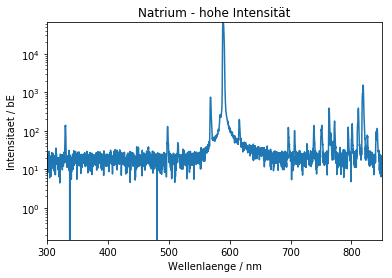

In [46]:
# Starke Linien des Natriumspektrums
lamb, inten = np.loadtxt('data/na_haupt.txt', skiprows=17, 
                         converters={0:comma_to_float, 1:comma_to_float}, 
                         comments='>', unpack=True)

plt.plot(lamb, inten)
plt.title('Natrium - hohe Intensität')
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Intensitaet / bE')

plt.yscale('log')
plt.ylim((0,65536))
plt.xlim((300,850))
plt.savefig("figures/Natrium_hohe_Intensität.pdf", format="pdf")

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


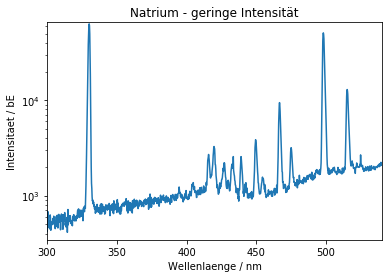

In [47]:
# Schwache Linien des Natriumspektrums
lamb, inten = np.loadtxt('data/na_kurz.txt', skiprows=17, 
                         converters={0:comma_to_float, 1:comma_to_float}, 
                         comments='>', unpack=True)
# im Bereich 300 bis 540nm
plt.plot(lamb, inten)
plt.title('Natrium - geringe Intensität')
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Intensitaet / bE')

plt.yscale('log')
plt.ylim((0,65536))
plt.xlim((300,540))
plt.savefig("figures/Natrium_geringe_Intensität1.pdf", format="pdf")



/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


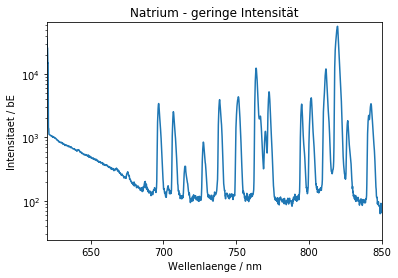

In [48]:
# im Bereich 600 bis 850nm
lamb, inten = np.loadtxt('data/na_lang.txt', skiprows=17, 
                         converters={0:comma_to_float, 1:comma_to_float}, 
                         comments='>', unpack=True)

plt.plot(lamb, inten)
plt.title('Natrium - geringe Intensität')
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Intensitaet / bE')

plt.yscale('log')
plt.ylim((0,65536))
plt.xlim((620,850))
plt.savefig("figures/Natrium_geringe_Intensität2.pdf", format="pdf")

In [49]:
E_3p = -(1.2398E3/819+13.605/9)
for m in range(3,13):
    l=1.2398E3/(-13.605/m**2-E_3p)
    print('m={m:2d}, lambda={l:6.2f}'.format(m=m,l=l))

m= 3, lambda=819.00
m= 4, lambda=569.98
m= 5, lambda=499.66
m= 6, lambda=468.28
m= 7, lambda=451.20
m= 8, lambda=440.76
m= 9, lambda=433.88
m=10, lambda=429.08
m=11, lambda=425.61
m=12, lambda=423.00


In [50]:
wellenl=np.array([819.1,569.9,499.5,468.3, 451.3,
                  441,434.8,431.6,428.3,421.4]) 
fehler=np.array([2,2,2,2,2,2,2,2,2,2])
quantenz=np.arange(3,13)

In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plot

Text(0.5,1,'1. Nebenserie des Na-Atoms')

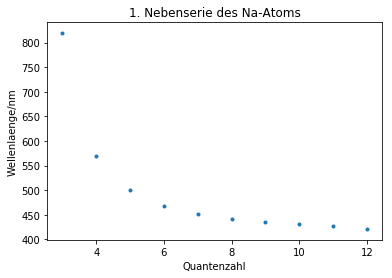

In [52]:
plt.errorbar(quantenz,wellenl,fehler, fmt=".")
plt.xlabel('Quantenzahl')
plt.ylabel('Wellenlaenge/nm')
plt.title('1. Nebenserie des Na-Atoms')

In [53]:
from scipy.optimize import curve_fit
def fit_func(m,E_Ry,E_3p,D_d):
    return 1.2398E3/(E_Ry/(m-D_d)**2-E_3p)

In [54]:
para=[-13.6,-3,-0.02]
popt, pcov=curve_fit(fit_func, quantenz, wellenl,sigma=fehler ,p0=para)

In [55]:
print("E_Ry=",popt[0],", Standardfehler=", np.sqrt(pcov[0][0]))
print("E_3p=",popt[1],", Standardfehler=", np.sqrt(pcov[1][1]))
print("D_d=",popt[2],", Standardfehler=", np.sqrt(pcov[2][2]))

E_Ry= -13.178930355269525 , Standardfehler= 0.43562568076578667
E_3p= -3.0165617395546485 , Standardfehler= 0.006461660888451888
D_d= 0.038854610644735915 , Standardfehler= 0.04394050317618657


In [56]:
chi2_=np.sum((fit_func(quantenz,*popt)-wellenl)**2/fehler**2)
dof=len(quantenz)-3
#dof:degrees of freedom, Freiheitsgrad
chi2_red=chi2_/dof
print("chi2=", chi2_)
print("chi2_red=",chi2_red)

chi2= 3.274574605776376
chi2_red= 0.467796372253768


Wahrscheinlichkeit: 86.0 %


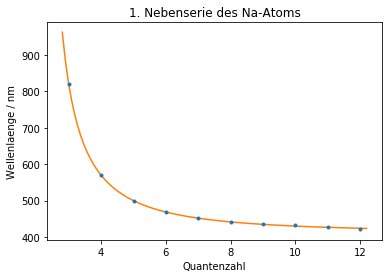

In [57]:
from scipy.stats import chi2
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit:", prob,"%")

plt.errorbar(quantenz,wellenl,fehler, fmt=".")
plt.xlabel('Quantenzahl')
plt.ylabel('Wellenlaenge / nm')
plt.title('1. Nebenserie des Na-Atoms')
x=np.linspace(2.8,12.2,100)
plt.plot(x, fit_func(x,*popt))
plt.savefig("figures/1_Nebenserie.pdf", format="pdf")

In [58]:
E_3p = -(1.2398E3/819+13.605/9)
for m in range(3,13):
    l=1.2398E3/(-13.605/m**2-E_3p)
    print('m={m:2d}, lambda={l:6.2f}'.format(m=m,l=l))

m= 3, lambda=819.00
m= 4, lambda=569.98
m= 5, lambda=499.66
m= 6, lambda=468.28
m= 7, lambda=451.20
m= 8, lambda=440.76
m= 9, lambda=433.88
m=10, lambda=429.08
m=11, lambda=425.61
m=12, lambda=423.00


In [59]:
wellenl=np.array([615,515,474.7,455,443.4]) 
fehler=np.array([2,2,2,2,2])
quantenz=np.arange(4,9)

Text(0.5,1,'2. Nebenserie des Na-Atoms')

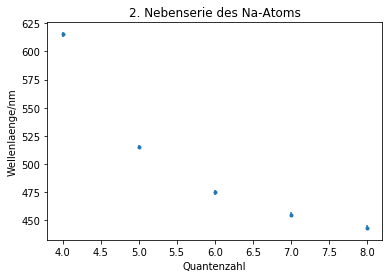

In [60]:
plt.errorbar(quantenz,wellenl,fehler, fmt=".")
plt.xlabel('Quantenzahl')
plt.ylabel('Wellenlaenge/nm')
plt.title('2. Nebenserie des Na-Atoms')

In [61]:
from scipy.optimize import curve_fit
def fit_func(m,E_Ry,E_3p,D_d):
    return 1.2398E3/(E_Ry/(m-D_d)**2-E_3p)

In [62]:
para=[-13.6,-3,-0.02]
popt, pcov=curve_fit(fit_func, quantenz, wellenl,sigma=fehler ,p0=para)

In [63]:
print("E_Ry=",popt[0],", Standardfehler=", np.sqrt(pcov[0][0]))
print("E_3p=",popt[1],", Standardfehler=", np.sqrt(pcov[1][1]))
print("D_d=",popt[2],", Standardfehler=", np.sqrt(pcov[2][2]))

E_Ry= -12.55983533641089 , Standardfehler= 0.48596323290292487
E_3p= -3.018444246593594 , Standardfehler= 0.007028654903186391
D_d= 0.4607016046245559 , Standardfehler= 0.05717956450516632


In [64]:
chi2_=np.sum((fit_func(quantenz,*popt)-wellenl)**2/fehler**2)
dof=len(quantenz)-3
#dof:degrees of freedom, Freiheitsgrad
chi2_red=chi2_/dof
print("chi2=", chi2_)
print("chi2_red=",chi2_red)

chi2= 0.09626089610866888
chi2_red= 0.04813044805433444


Wahrscheinlichkeit: 95.0 %


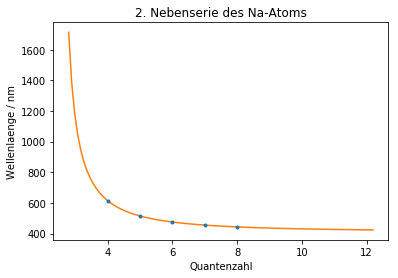

In [65]:
from scipy.stats import chi2
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit:", prob,"%")

plt.errorbar(quantenz,wellenl,fehler, fmt=".")
plt.xlabel('Quantenzahl')
plt.ylabel('Wellenlaenge / nm')
plt.title('2. Nebenserie des Na-Atoms')
x=np.linspace(2.8,12.2,100)
plt.plot(x, fit_func(x,*popt))
plt.savefig("figures/2_Nebenserie.pdf", format="pdf")